In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('mimic/PRESCRIPTIONS.csv')

# Print the columns
print(df.columns)

/tmp/ipykernel_10674/82368686.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('mimic/PRESCRIPTIONS.csv')


Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'STARTDATE', 'ENDDATE',
       'DRUG_TYPE', 'DRUG', 'DRUG_NAME_POE', 'DRUG_NAME_GENERIC',
       'FORMULARY_DRUG_CD', 'GSN', 'NDC', 'PROD_STRENGTH', 'DOSE_VAL_RX',
       'DOSE_UNIT_RX', 'FORM_VAL_DISP', 'FORM_UNIT_DISP', 'ROUTE'],
      dtype='object')


In [13]:
from bokeh.plotting import figure, show
from bokeh.models import LinearColorMapper, ColorBar
from bokeh.palettes import Viridis256
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LinearColorMapper, ColorBar, BasicTicker, BasicTickFormatter
from bokeh.io import output_notebook


# Group the dataframe by 'DRUG' column and count the occurrences
grouped_df = df.groupby('DRUG').size().reset_index(name='count')

# Sort the grouped dataframe by count in descending order
sorted_df = grouped_df.sort_values('count', ascending=False)

# Select the top 5 drugs
top_5_drugs = sorted_df.head(5)
# Create a Bokeh figure
p = figure(title = 'Top 5 Drugs by Prescription Count', 
           x_axis_label = 'Drug', 
           y_axis_label = 'Number of Prescriptions',
           x_range = top_5_drugs['DRUG'],
         
           tools = '')
# Create a ColumnDataSource
source = ColumnDataSource(data=dict(drug_name=top_5_drugs['DRUG'],count=top_5_drugs['count']))
p.xaxis.axis_label = 'Drug Name'
p.yaxis.axis_label = 'Number of Prescriptions'

# Create a LinearColorMapper
color_mapper = LinearColorMapper(palette='Viridis256', low=top_5_drugs['count'].min(), high=top_5_drugs['count'].max())

# Create a ColorBar
color_bar = ColorBar(color_mapper=color_mapper, location=(0, 0), ticker=BasicTicker(), formatter=BasicTickFormatter(use_scientific=False))

# Add the ColorBar to the figure
p.add_layout(color_bar, 'right')
p.scatter(x='drug_name', y='count', source=source, size=20, fill_color={'field': 'count', 'transform': color_mapper}, line_color=None)

# Show the figure
p.width = 800
p.yaxis.formatter.use_scientific = False

output_notebook()

show(p)

Loading BokehJS ...

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
#df = pd.read_csv('mimic/CHARTEVENTS.csv')

# Print the columns
#print(df.columns)
# patient bpm data and use box annotation to highlight the normal range of 60-100 bpm
# Read only the first 1000 lines from the CSV file
df_evnt = pd.read_csv('mimic/CHARTEVENTS.csv', nrows=10000)

# Print the columns
print(df_evnt.columns)

# print top 5 rows of the dataframe
print(df_evnt.head())
#print unique values of VALUEUOM column
print(df_evnt['VALUEUOM'].unique())
#remove records with VALUEUOM as 'NaN'
df_evnt = df_evnt.dropna(subset=['VALUEUOM'])
#filter records with VALUEUOM as 'bpm'
df_evnt = df_evnt[df_evnt['VALUEUOM'] == 'bpm']
# Add code for patient bpm data and box annotation here

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ITEMID', 'CHARTTIME',
       'STORETIME', 'CGID', 'VALUE', 'VALUENUM', 'VALUEUOM', 'WARNING',
       'ERROR', 'RESULTSTATUS', 'STOPPED'],
      dtype='object')
   ROW_ID  SUBJECT_ID  HADM_ID  ICUSTAY_ID  ITEMID            CHARTTIME  \
0     788          36   165660      241249  223834  2134-05-12 12:00:00   
1     789          36   165660      241249  223835  2134-05-12 12:00:00   
2     790          36   165660      241249  224328  2134-05-12 12:00:00   
3     791          36   165660      241249  224329  2134-05-12 12:00:00   
4     792          36   165660      241249  224330  2134-05-12 12:00:00   

             STORETIME   CGID   VALUE  VALUENUM VALUEUOM  WARNING  ERROR  \
0  2134-05-12 13:56:00  17525   15.00     15.00    L/min        0      0   
1  2134-05-12 13:56:00  17525  100.00    100.00      NaN        0      0   
2  2134-05-12 12:18:00  20823    0.37      0.37      NaN        0      0   
3  2134-05-12 12:19:00  2082

In [1]:
import pandas as pd


# Read only the first 1000 lines from the CSV file
df_patients = pd.read_csv('mimic/PATIENTS.csv')

# Print the columns
print(df_patients.columns)

Index(['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG'],
      dtype='object')


In [5]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Join df_patients and df_evnt on SUBJECT_ID
merged_df = pd.merge(df_patients, df_evnt, on='SUBJECT_ID')
# Filter the merged dataframe by expire_flag = 1
filtered_df = merged_df[merged_df['EXPIRE_FLAG'] == 1]

# Display the filtered dataframe
# Filter the merged dataframe by expire_flag = 0
filtered_df_0 = merged_df[merged_df['EXPIRE_FLAG'] == 0]

# Create a new figure
p = figure(title='Scatter Plot', x_axis_label='Index', y_axis_label='BPM')

# Add scatter plot for expire_flag = 1 in blue color
p.scatter(x=filtered_df.index, y=filtered_df['VALUE'], size=8, color='red')

# Add scatter plot for expire_flag = 0 in green color
p.scatter(x=filtered_df_0.index, y=filtered_df_0['VALUE'], size=8, color='green')

# Show the plot
output_notebook()
show(p)


Loading BokehJS ...

In [2]:
#patient weight category vs discharge/death or ICU stays
#use transform markers
import pandas as pd


# Read only the first 1000 lines from the CSV file
df_icu_stays = pd.read_csv('mimic/ICUSTAYS.csv')

# Print the columns
print(df_icu_stays.columns)

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'DBSOURCE',
       'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID',
       'INTIME', 'OUTTIME', 'LOS'],
      dtype='object')


In [5]:
# Convert INTIME and OUTTIME columns to datetime objects
df_icu_stays['INTIME'] = pd.to_datetime(df_icu_stays['INTIME'])
df_icu_stays['OUTTIME'] = pd.to_datetime(df_icu_stays['OUTTIME'])

# Calculate the length of stay
df_icu_stays['LOS'] = df_icu_stays['LOS'].dt.total_seconds() / 60

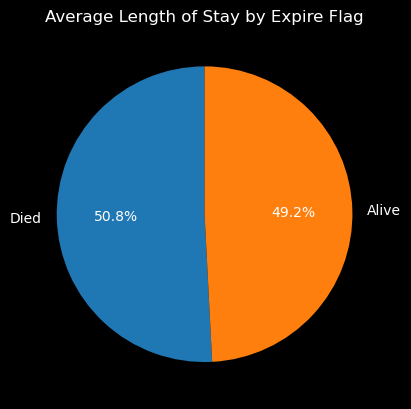

In [6]:

import matplotlib.pyplot as plt
# Join df_patients and df_icu_stays on SUBJECT_ID
merged_df = pd.merge(df_patients, df_icu_stays, on='SUBJECT_ID')

# Filter the merged dataframe by expire_flag = 0
filtered_df_0 = merged_df[merged_df['EXPIRE_FLAG'] == 0]

# Calculate the average LOS for expire_flag = 0
avg_los_0 = filtered_df_0['LOS'].mean()

# Filter the merged dataframe by expire_flag = 1
filtered_df_1 = merged_df[merged_df['EXPIRE_FLAG'] == 1]

# Calculate the average LOS for expire_flag = 1
avg_los_1 = filtered_df_1['LOS'].mean()


# Data for the pie chart
labels = ['Died', 'Alive']
sizes = [avg_los_1, avg_los_0]
colors = ['#1f77b4', '#ff7f0e']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Average Length of Stay by Expire Flag')

# Display the chart
plt.show()

In [8]:
import pandas as pd


# Read only the first 1000 lines from the CSV file
df_lab_items = pd.read_csv('mimic/D_LABITEMS.csv')

# Print the columns
print(df_lab_items.columns)
df_lab_items.head()

Index(['ROW_ID', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE'], dtype='object')


,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
1,547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
3,549,51349,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology,26506-6
4,550,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,NaN


In [10]:
import pandas as pd


# Read only the first 1000 lines from the CSV file
df_lab_events = pd.read_csv('mimic/LABEVENTS.csv', nrows=10000)

# Print the columns
print(df_lab_events.columns)
df_lab_events.head()

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ITEMID', 'CHARTTIME', 'VALUE',
       'VALUENUM', 'VALUEUOM', 'FLAG'],
      dtype='object')


,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal


In [13]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Category10

# Join df_lab_items and df_lab_events on ITEMID
merged_df = pd.merge(df_lab_items, df_lab_events, on='ITEMID')

# Join merged_df with df_patients on SUBJECT_ID and filter for patients with EXPIRE_FLAG = 1
filtered_df = pd.merge(merged_df, df_patients[df_patients['EXPIRE_FLAG'] == 1], on='SUBJECT_ID')

# Group the data by LABEL and count the occurrences
grouped_df = filtered_df.groupby('LABEL').size().reset_index(name='count')

# Sort the grouped dataframe by count in descending order
sorted_df = grouped_df.sort_values('count', ascending=False)

# Select the top 5 labels
top_5_labels = sorted_df.head(5)

# Create a Bokeh bar chart
p = figure(x_range=top_5_labels['LABEL'], height=400, width=800, title='Top 5 Lab Tests for Expired Patients',
           toolbar_location=None, tools='')

# Add the bars to the chart
p.vbar(x=top_5_labels['LABEL'], top=top_5_labels['count'], width=0.9, color=Category10[5])

# Set the x-axis label
p.xaxis.axis_label = 'Label'

# Set the y-axis label
p.yaxis.axis_label = 'Count'

# Rotate the x-axis labels
p.xaxis.major_label_orientation = 45

# Show the chart
output_notebook()
show(p)

Loading BokehJS ...

In [14]:
import pandas as pd


# Read only the first 1000 lines from the CSV file
df_mb_events = pd.read_csv('mimic/MICROBIOLOGYEVENTS.csv', nrows=10000)

# Print the columns
print(df_mb_events.columns)
df_mb_events.head()

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'SPEC_ITEMID', 'SPEC_TYPE_DESC', 'ORG_ITEMID', 'ORG_NAME',
       'ISOLATE_NUM', 'AB_ITEMID', 'AB_NAME', 'DILUTION_TEXT',
       'DILUTION_COMPARISON', 'DILUTION_VALUE', 'INTERPRETATION'],
      dtype='object')


,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,744,96,170324,2156-04-13 00:00:00,2156-04-13 14:18:00,70021,BRONCHOALVEOLAR LAVAGE,80026.0,PSEUDOMONAS AERUGINOSA,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,745,96,170324,2156-04-20 00:00:00,2156-04-20 13:10:00,70062,SPUTUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,746,96,170324,2156-04-20 00:00:00,2156-04-20 16:00:00,70012,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,747,96,170324,2156-04-20 00:00:00,NaN,70012,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,748,96,170324,2156-04-20 00:00:00,NaN,70079,URINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


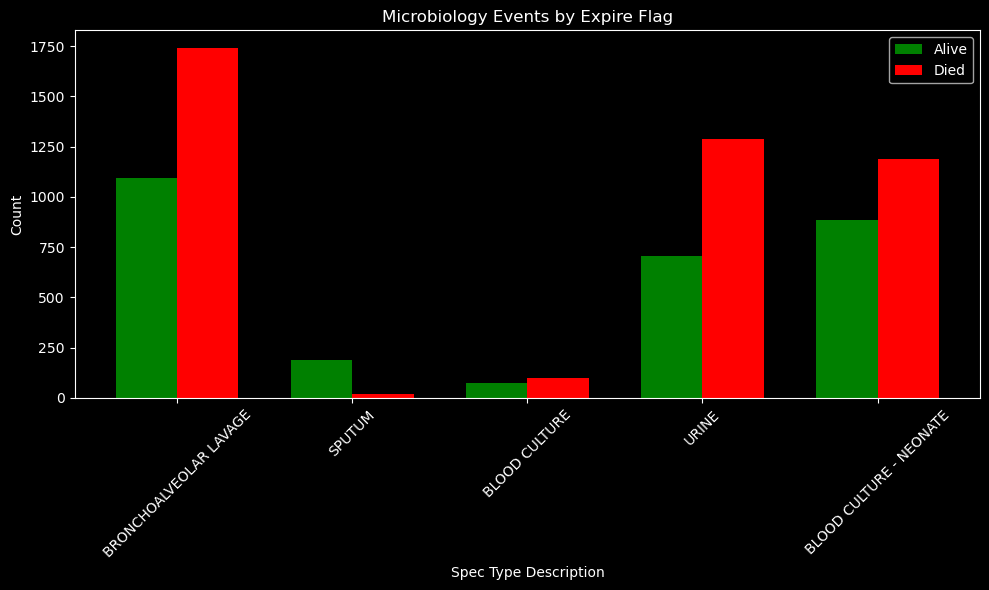

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Join df_patients and df_mb_events on SUBJECT_ID
merged_df = pd.merge(df_patients, df_mb_events, on='SUBJECT_ID')

# Filter the grouped dataframe for the top 5 spec_type_desc
top_5_spec_types = ['BRONCHOALVEOLAR LAVAGE', 'SPUTUM', 'BLOOD CULTURE', 'URINE', 'BLOOD CULTURE - NEONATE']
top_5_grouped_df = merged_df[merged_df['SPEC_TYPE_DESC'].isin(top_5_spec_types)]

# Group by SPEC_TYPE_DESC and EXPIRE_FLAG and count occurrences
grouped = top_5_grouped_df.groupby(['SPEC_TYPE_DESC', 'EXPIRE_FLAG']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width and positions
bar_width = 0.35
index = np.arange(len(top_5_spec_types))

# Bar positions
bar1 = ax.bar(index - bar_width/2, grouped[0], bar_width, label='Alive', color='green')
bar2 = ax.bar(index + bar_width/2, grouped[1], bar_width, label='Died', color='red')
# Set bar color to red for expire_flag = 1 (Died)


# Set bar color to green for expire_flag = 0 (Alive)

# Set labels and title
ax.set_xlabel('Spec Type Description')
ax.set_ylabel('Count')
ax.set_title('Microbiology Events by Expire Flag')
ax.set_xticks(index)
ax.set_xticklabels(top_5_spec_types)
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
